<a href="https://colab.research.google.com/github/VenkatasaipavankalyanJidigam/Logistic/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression


In [ ]:
#Load the data set
claimants = pd.read_csv("claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


### task is to predict the attorney column

In [ ]:
claimants[claimants.duplicated()]

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS


In [ ]:
len(claimants.CASENUM.unique())

1283

In [ ]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True,axis = 1)

In [ ]:
#Shape of the data set
claimants.shape

(1340, 7)

In [ ]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [ ]:
claimants.isnull().sum()

,0
ATTORNEY,0
CLMSEX,12
CLMINSUR,41
SEATBELT,48
CLMAGE,189
LOSS,0


In [ ]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [ ]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
# Dividing our data into input and output variables
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [ ]:
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [ ]:
Y.head()

,ATTORNEY
0,0
1,1
2,1
3,0
4,1


In [ ]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X,Y)

LinearRegression()

In [ ]:
linear.predict(X) #we are predicting the independent data these are y hat values

array([0.11777368, 0.41159564, 0.46990802, ..., 0.56879252, 0.38444919,
       0.55987294])

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y, linear.predict(X))

0.06740699602264077

In [ ]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [ ]:
#Predict for X dataset
y_pred = classifier.predict(X)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
classifier.predict_proba(X)
#classifier.predict_proba(X)[:,1] to get all rows and d1 column

array([[9.99996954e-01, 3.04592568e-06],
       [4.92832148e-01, 5.07167852e-01],
       [4.24835532e-01, 5.75164468e-01],
       ...,
       [2.60970584e-01, 7.39029416e-01],
       [7.14046063e-01, 2.85953937e-01],
       [3.19569059e-01, 6.80430941e-01]])

In [ ]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict_proba(X)[:,1],
                         'y_predictions':y_pred})

In [ ]:
y_pred_df

,actual,predicted_prob,y_predictions
0,0,0.000003,0
1,1,0.507168,1
2,1,0.575164,1
3,0,0.497716,0
4,1,0.640754,1
...,...,...,...
1334,1,0.712081,1
1336,0,0.425825,0
1337,1,0.739029,1
1338,0,0.285954,0


In [ ]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix,accuracy_score


In [ ]:
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [ ]:
accuracy_score(Y,y_pred)

0.708029197080292

In [ ]:
#By using the formula
#accuracy=(TP+TN)/(TP+TN+FP+FN)
Accuracy=((381+395)/(381+197+123+395))*100
Accuracy

70.8029197080292

In [ ]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [ ]:
# ROC Curve

In [ ]:
classifier.predict_proba (X)

array([[9.99996954e-01, 3.04592568e-06],
       [4.92832148e-01, 5.07167852e-01],
       [4.24835532e-01, 5.75164468e-01],
       ...,
       [2.60970584e-01, 7.39029416e-01],
       [7.14046063e-01, 2.85953937e-01],
       [3.19569059e-01, 6.80430941e-01]])

Text(0, 0.5, 'True Positive Rate')

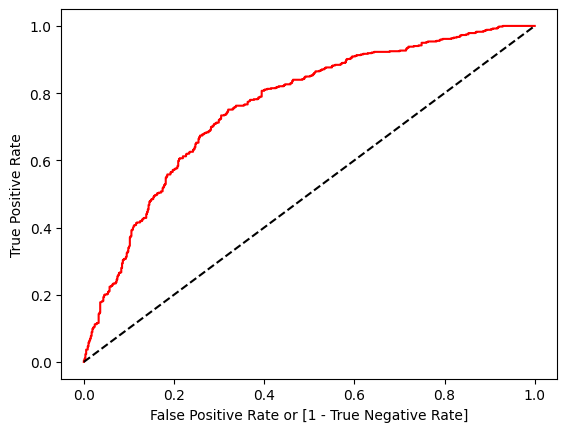

In [ ]:
# Roc curve is for values vs predicted probability

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [ ]:
auc

np.float64(0.7108589063606365)

In [ ]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on 

In [ ]:
roc_curve(Y, classifier.predict_proba (X)[:,1])


(array([0.        , 0.        , 0.        , 0.0017301 , 0.0017301 ,
        0.00346021, 0.00346021, 0.00519031, 0.00519031, 0.00865052,
        0.00865052, 0.01038062, 0.01038062, 0.01211073, 0.01211073,
        0.01384083, 0.01384083, 0.01557093, 0.01557093, 0.01730104,
        0.01730104, 0.01903114, 0.01903114, 0.02076125, 0.02076125,
        0.02249135, 0.02249135, 0.02422145, 0.02422145, 0.02768166,
        0.02768166, 0.02941176, 0.02941176, 0.03287197, 0.03287197,
        0.03287197, 0.03287197, 0.03460208, 0.03460208, 0.03633218,
        0.03633218, 0.03806228, 0.03979239, 0.04152249, 0.04152249,
        0.0432526 , 0.0432526 , 0.0449827 , 0.0449827 , 0.0467128 ,
        0.0467128 , 0.05017301, 0.05190311, 0.05190311, 0.05363322,
        0.05363322, 0.05536332, 0.05536332, 0.05709343, 0.05709343,
        0.06055363, 0.06055363, 0.06228374, 0.06228374, 0.06401384,
        0.06401384, 0.06574394, 0.06574394, 0.07093426, 0.07093426,
        0.07266436, 0.07266436, 0.07439446, 0.07